In [1]:
from google.colab import files
uploaded = files.upload()

Saving Report_Original.xlsx to Report_Original.xlsx


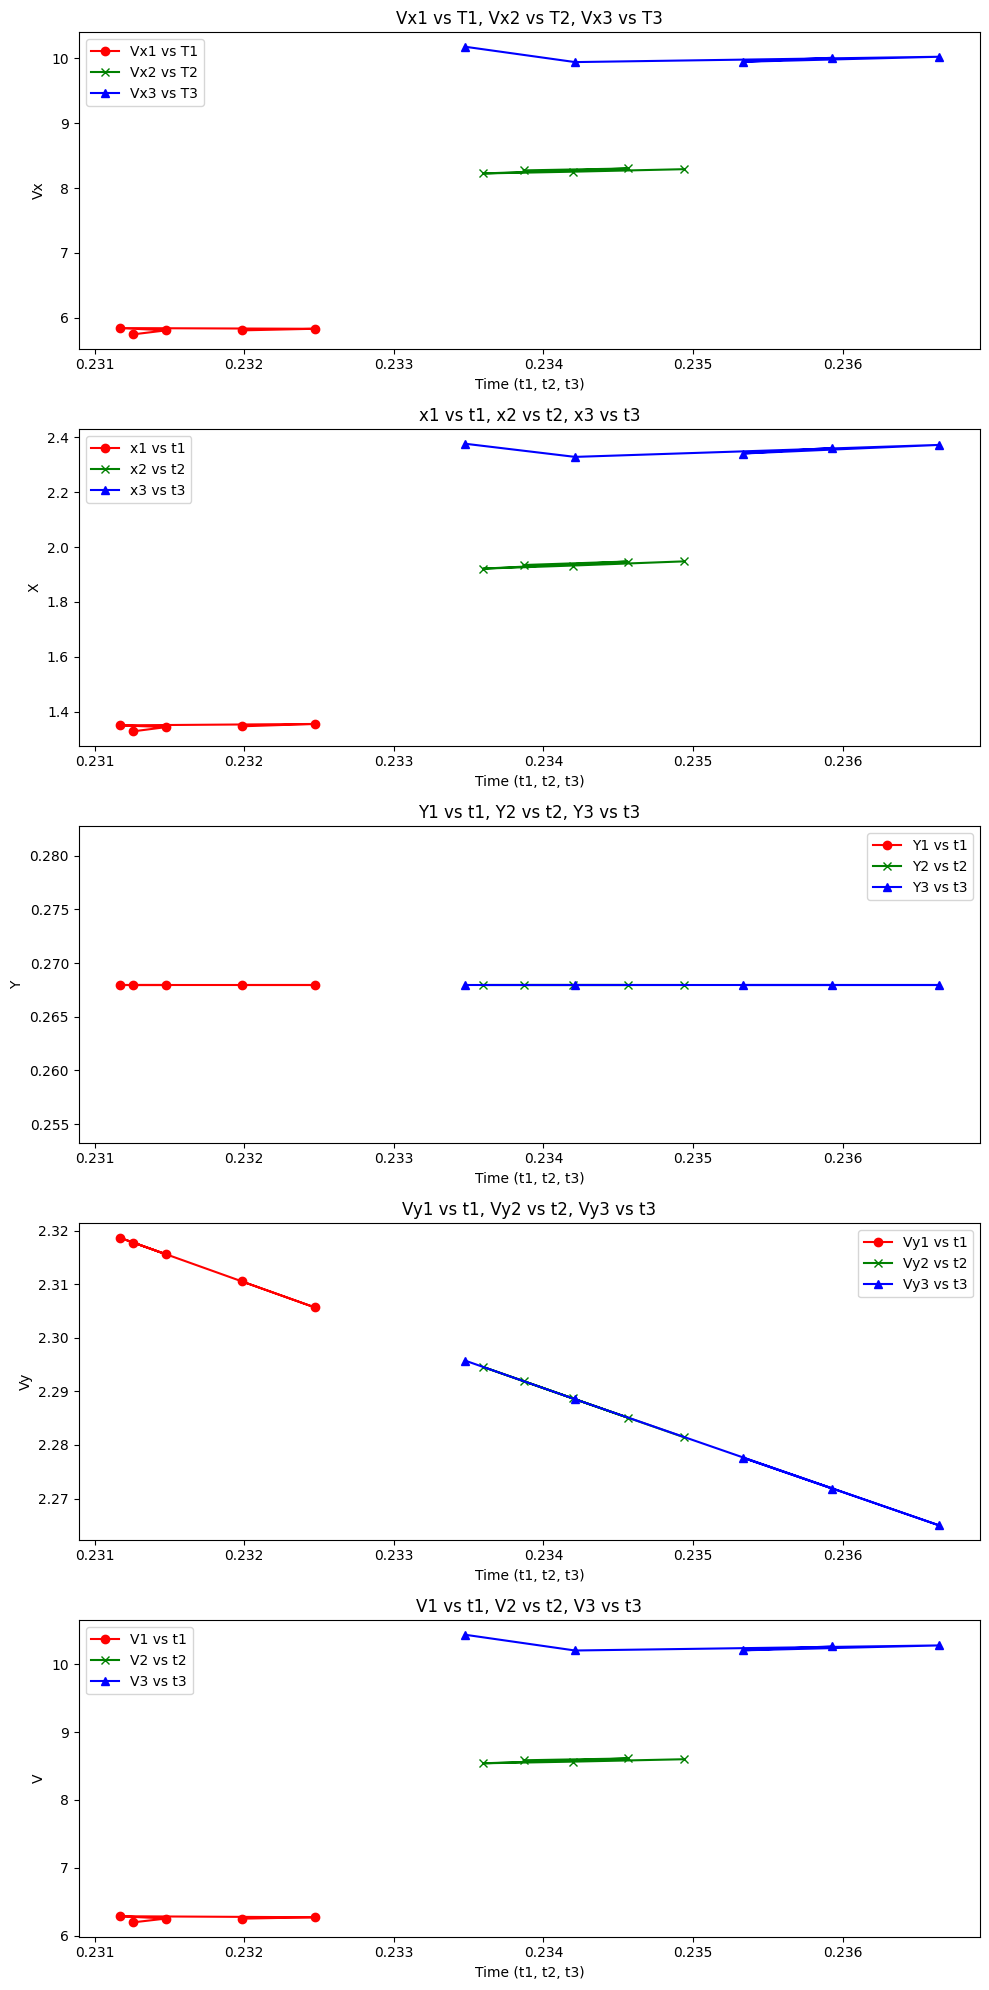

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('Report_Original.xlsx')

# Calculate t3, t2, t1
df['t3'] = df['t230'] - df['t130']
df['t2'] = df['t220'] - df['t120']
df['t1'] = df['t210'] - df['t110']

# Calculate g1, g2, g3
df['g1'] = -(2 * 0.268) / (df['t1'] ** 2)
df['g2'] = -(2 * 0.268) / (df['t2'] ** 2)
df['g3'] = -(2 * 0.268) / (df['t3'] ** 2)

# Calculate Vy1, Vy2, Vy3
df['Vy1'] = -df['g1'] * df['t1']
df['Vy2'] = -df['g2'] * df['t2']
df['Vy3'] = -df['g3'] * df['t3']

# Assign Vx1, Vx2, Vx3 from v110, v120, v130
df['Vx1'] = df['v110']
df['Vx2'] = df['v120']
df['Vx3'] = df['v130']

# Calculate X1, X2, X3
df['X1'] = df['Vx1'] * df['t1']
df['X2'] = df['Vx2'] * df['t2']
df['X3'] = df['Vx3'] * df['t3']

# Calculate Y1, Y2, Y3
df['Y1'] = -(0.5 * df['g1'] * (df['t1'] ** 2))
df['Y2'] = -(0.5 * df['g2'] * (df['t2'] ** 2))  # New y2 based on t2 and g2
df['Y3'] = -(0.5 * df['g3'] * (df['t3'] ** 2))  # New y3 based on t3 and g3

# Calculate V1, V2, V3 (sqrt(Vy^2 + Vx^2) for each)
df['V1'] = np.sqrt(df['Vy1']**2 + df['Vx1']**2)
df['V2'] = np.sqrt(df['Vy2']**2 + df['Vx2']**2)
df['V3'] = np.sqrt(df['Vy3']**2 + df['Vx3']**2)

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plot Vx1 vs T1, Vx2 vs T2, Vx3 vs T3
axs[0].plot(df['t1'], df['Vx1'], label='Vx1 vs T1', color='r', marker='o')
axs[0].plot(df['t2'], df['Vx2'], label='Vx2 vs T2', color='g', marker='x')
axs[0].plot(df['t3'], df['Vx3'], label='Vx3 vs T3', color='b', marker='^')
axs[0].set_xlabel('Time (t1, t2, t3)')
axs[0].set_ylabel('Vx')
axs[0].set_title('Vx1 vs T1, Vx2 vs T2, Vx3 vs T3')
axs[0].legend()

# Plot X1 vs t1, X2 vs t2, X3 vs t3
axs[1].plot(df['t1'], df['X1'], label='x1 vs t1', color='r', marker='o')
axs[1].plot(df['t2'], df['X2'], label='x2 vs t2', color='g', marker='x')
axs[1].plot(df['t3'], df['X3'], label='x3 vs t3', color='b', marker='^')
axs[1].set_xlabel('Time (t1, t2, t3)')
axs[1].set_ylabel('X')
axs[1].set_title('x1 vs t1, x2 vs t2, x3 vs t3')
axs[1].legend()

# Plot Y1 vs t1, Y2 vs t2, Y3 vs t3
axs[2].plot(df['t1'], df['Y1'], label='Y1 vs t1', color='r', marker='o')
axs[2].plot(df['t2'], df['Y2'], label='Y2 vs t2', color='g', marker='x')
axs[2].plot(df['t3'], df['Y3'], label='Y3 vs t3', color='b', marker='^')
axs[2].set_xlabel('Time (t1, t2, t3)')
axs[2].set_ylabel('Y')
axs[2].set_title('Y1 vs t1, Y2 vs t2, Y3 vs t3')
axs[2].legend()

# Plot Vy1 vs t1, Vy2 vs t2, Vy3 vs t3
axs[3].plot(df['t1'], df['Vy1'], label='Vy1 vs t1', color='r', marker='o')
axs[3].plot(df['t2'], df['Vy2'], label='Vy2 vs t2', color='g', marker='x')
axs[3].plot(df['t3'], df['Vy3'], label='Vy3 vs t3', color='b', marker='^')
axs[3].set_xlabel('Time (t1, t2, t3)')
axs[3].set_ylabel('Vy')
axs[3].set_title('Vy1 vs t1, Vy2 vs t2, Vy3 vs t3')
axs[3].legend()

# Plot V1 vs t1, V2 vs t2, V3 vs t3
axs[4].plot(df['t1'], df['V1'], label='V1 vs t1', color='r', marker='o')
axs[4].plot(df['t2'], df['V2'], label='V2 vs t2', color='g', marker='x')
axs[4].plot(df['t3'], df['V3'], label='V3 vs t3', color='b', marker='^')
axs[4].set_xlabel('Time (t1, t2, t3)')
axs[4].set_ylabel('V')
axs[4].set_title('V1 vs t1, V2 vs t2, V3 vs t3')
axs[4].legend()

plt.tight_layout()
plt.show()

